<a href="https://colab.research.google.com/github/AtriSaxena/Tensorflow-2.X-Zero2Mastery/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Times series forecasting with Tensorflow & Milestone project 3: Bitpredict 💰💲

Let's write some Tensorflow code to predict the price of Bitcoin based on the historical price of Bitcoin. 

Links: 
* https://github.com/mrdbourke/tensorflow-deep-learning/ 


### Get Data 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-05-02 17:43:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2022-05-02 17:43:41 (18.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Importing timeseries with pandas 

In [2]:
#Import with pandas 
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], 
                                            index_col = ["Date"]) #Parse the date column and tell pandas column 1 is a Date time column 
df.head() 

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail() 

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Above data is in float64 but tensorflow like data to be in float32 and numpy like to be in float64

In [5]:
len(df)

2787

We'hv collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples. 

Typically deep learning models usually like lot and lots of samples (where lot and lots of can be hundered, thousand or millions). 

A smaller number of samples is something you'll often run with time series data problems. 

> 🔑**Note**: The **seasonality** of a time series dataset is referred as the number of samples per year. 
So, for our bitcoin data, it has a seasonality of daily or values of 365 because we collect one sample per day meaning, we'll get 365 samples per year.

In [6]:
#only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


No handles with labels found to put in legend.


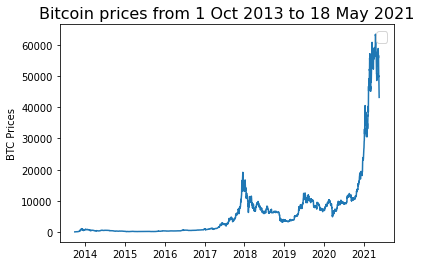

In [7]:
#visualize the data  
import matplotlib.pyplot as plt 

plt.plot(bitcoin_prices)
plt.ylabel('BTC Prices')
plt.title('Bitcoin prices from 1 Oct 2013 to 18 May 2021', fontsize=16) 
plt.legend(fontsize=14);

### Importing time series data with Python CSV module 

In [8]:
# Importing and formating historical bitcoin data with python 
import csv 
from datetime import datetime

timesteps = [] 
btc_prices = [] 
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f: 
  csv_reader = csv.reader(f, delimiter = ',') 
  next(csv_reader)  #Skip fist line (this gets rid of the column title) 
  for line in csv_reader: 
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    btc_prices.append(float(line[2])) 

timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

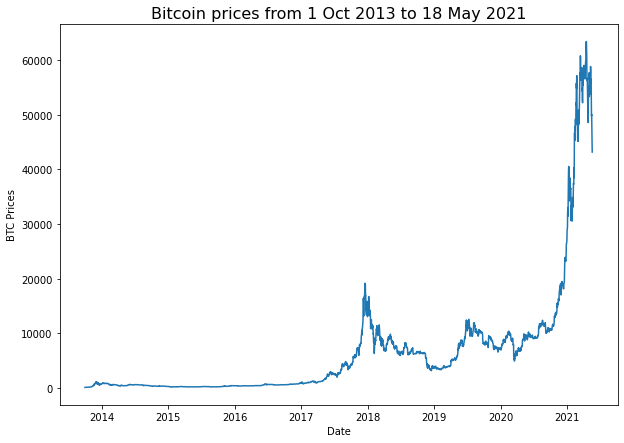

In [9]:
plt.figure(figsize = (10,7)) 
plt.plot(timesteps, btc_prices) 
plt.ylabel('BTC Prices')
plt.title('Bitcoin prices from 1 Oct 2013 to 18 May 2021', fontsize=16) 
plt.xlabel("Date")

## Format Data Part 1: Create train and test set of our time series data 



### Create train and test set of time series data (the wrong way) 

In [10]:
# Get bitcoin data array 
timesteps = bitcoin_prices.index.to_numpy() 
prices = bitcoin_prices['Price'].to_numpy() 

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
 #Wrong way to make train/test set for time series data
 from sklearn.model_selection import train_test_split 

 X_train, X_test, y_train, y_test = train_test_split(timesteps, 
                                                     prices, 
                                                     test_size=0.2, 
                                                     random_state=42)
 
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

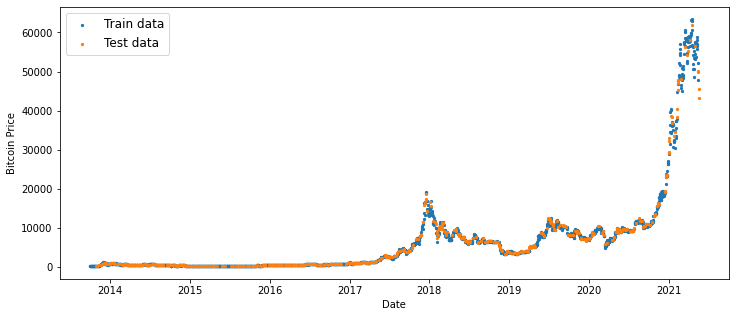

In [12]:
plt.figure(figsize = (12,5)) 
plt.scatter(X_train, y_train, s =5, label="Train data") 
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date") 
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=12)

### Create train & test set for time series (Right way)

In [13]:
#Create train and test set the right way 
split_size = int(0.8 * len(prices)) #80% train and 20% test 

#Create train split (everything before the split) 
X_train, y_train = timesteps[:split_size], prices[:split_size] 

#Create test split (everything after the split) 
X_test, y_test = timesteps[split_size:] , prices[split_size:] 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

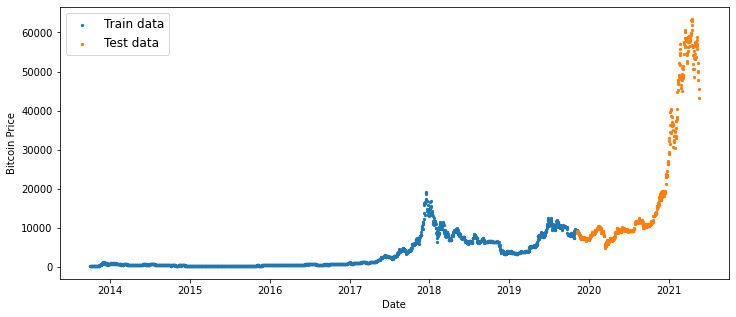

In [14]:
#Lets try to plot train and test data 
plt.figure(figsize = (12,5)) 
plt.scatter(X_train, y_train, s =5, label="Train data") 
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date") 
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=12)

## Create a plotting function 

Typing plotting code is tedious, let's functionize it. 

In [15]:
#Create a function to plot time series data 
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None): 
  """
  Plots timesteps (a series of points in time) against values (a series of values across timestamp)

  Parameters: 
  --------------
  timesteps: array of timestamp values 
  values: array of values across time
  format: style of plot, default "." scatter
  start: where to start the plot (setting a value will index from start of timesteps) 
  end: where to end the plot
  label: label to show on plot about values 
  """

  # Plot the series 
  plt.plot(timesteps[start:end], values[start:end],format, label=label)
  plt.xlabel("Time") 
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

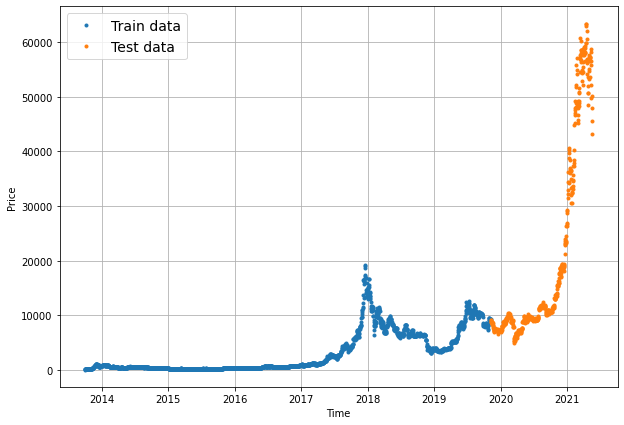

In [16]:
plt.figure(figsize=(10,7)) 
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")

## Modelling Experiments 

We've got some bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best. 

Terms to be familiar with: 
* **Horizon:** No of timesteps into the future we are going to predict. 
* **Window:** No of timesteps we're going to use to predict horizon. 

Experiment we will be running:

0. Navie Model (baseline) 
1. Dense Model, Horizon = 1, window=7 
2. Same as 1, horizon=1, window=30
3. Same as 1, horizon=7, window=30 
4. Conv1D 
5. LSTM 
6. Same as 1 but with Multivariate data 
7. N-BEATS Algorithm 
8. Ensemble (Multiple models optimized on different loss function) 
9. Future Prediction Model(Model to predict future values) 
10. Same as 1 (but with turkey data introduced)

### Model 0: Naive Forecast (baseline) 
The formula looks like this: 

$$\hat{y}_{t} = y_{t-1}$$

in English: 
> The prediction at timestamp t (y-hat) is equal to the value at timestamp t-1 (previous timestep) this is for a horizon of 1.

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [18]:
#Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

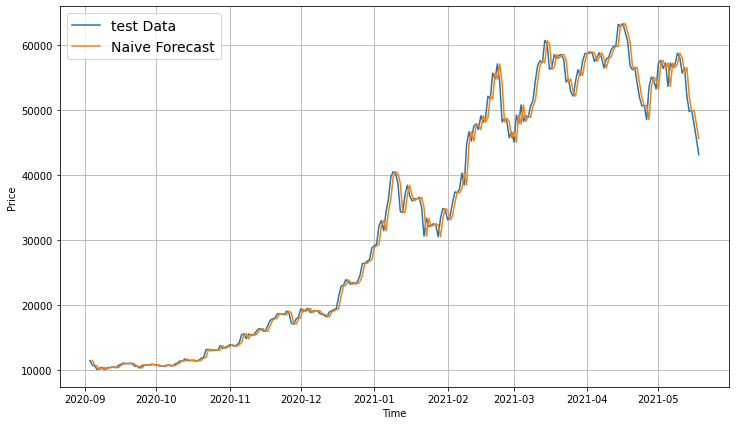

In [19]:
#Plot naive forecast 
plt.figure(figsize=(12,7)) 
#plot_time_series(timesteps = X_train, values = y_train, label="Train data")
plot_time_series(timesteps=X_test, values = y_test,start=300,format="-",label="test Data") 
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=300, format="-", label="Naive Forecast")

> **Exercise** Spend ten minutes reading the simple forecasts chapter of Forecasting: Principal in Practice. And have a search to find out why the naive forecast is hard to beat, does the term auto regressive comes up? 

## Evaluating a timeseries model 

Let's look into some evaluation metrics for timeseries forecasting. 

What we are doing? 

We're predicting a number, so that means we have a form of a regression problem. 

Because we are working on regression problem, we'll need some regression like metrics. 

A few common regression metrics

* MAE (Mean Absolute Error) 
* MSE (Mean Squared Error) 
* RMSE (Root mean squared error) 
* MAPE/sMAPE: (Symmetric mean absolute percentage error) 
* MASE: Mean absolute scaled error 

For all the above metrics, **lower is better*, for example an MAE of 0 is better than MAE of 100.

The main thing we're evaluating here is: How do our models forecast (y_pred) compare against the actual values y-true or ground truth values

> **Resources:** For a deeper dive on the various kinds of timeseries forecasting methods see https://otexts.com/fpp3/accuracy.html

In [20]:
 import tensorflow as tf 

In [21]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred): 
  """
  Implement MASE (assuming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred)) 

  #Find MAE of naive forecast (No seasonality) 

  mae_naive_noseason = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) #our

  return mae / mae_naive_noseason

In [22]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [23]:
# Create a function to take in model Prediction and truth values and return evaluation metrics 
def evaluate_preds(y_true, y_pred): 
  #Make sure float32 data types (for metric calculation)
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32) 

  #Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(), 
          "rmse": rmse.numpy(), 
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
#Lets see our function works 

naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast) 

naive_results 

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Other Models we can use for baselines and for actual forecast. 

In this notebook, we're focused on Tensorflow and deep learning models. 

However, there are plenty of other style of time series forecasting models you want to experiment with.: 

https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset 

Why do we window? 

We window our time series dataset to turn our dataset into a supervised learning problem. 

```
Windowing for one week 
[0,1,2,3,4,5,6] -> [7] 
[1,2,3,4,5,6,7] -> [8] 
[2,3,4,5,6,7,8] -> [9]

```

In [25]:
len(y_train)

2229

In [26]:
#What we want to do with our Bitcoin data 
print(f"We want to use: {btc_prices[:7]} to predict this: {btc_prices[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [27]:
#Lets setup global variables for window and horizon size
HORIZON=1 #Predict next 1 day 
WINDOW_SIZE = 7 #use the past 1 week of Bitcoin data to make the prediction 

In [28]:
#Create function to label windowed data 
def get_labelled_windows(x, horizon=HORIZON): 
  """
  Create labels for windowed dataset. 

  E.g. if Horizon=1
  input: [0, 1, 2, 3, 4, 5, 6, 7]  -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [29]:
# Test out the window labelling function 
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window.numpy())} -> Label: {tf.squeeze(test_label.numpy())}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data. 

However, this only works on a small scale. 

We need a way to do the above across our entire time series. 

We could do this with python for loops, however for large time series, that'd be quite slow. 

To speed things up, we'll leverage Numpy's array indexing. 
https://numpy.org/doc/stable/user/basics.indexing.html

Our function will: 
1. Create a window step of specific window size. (e.g., [0, 1, 2, 3, 4, 5, 6]) 
2. Use numpy indexing to create a 2D array of Multiple window steps, for example: 

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin) 
4. Uses our `get_labelled_windows()` function we have created above to turn the window steps the window steps into window with a specified horizon. 

📚**Resources:** The function we're about to create has been adapted from the following article: 
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [30]:
import numpy as np
#Create function to view numpy array as windows 
def make_windows(x, window_size = WINDOW_SIZE, horizon= HORIZON): 
  """
  Turns a 1D array into a 2D array of sequential labelled window of window_size with horizon size labels.
  """
  # 1. Create a  window of speicific window size(add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (Minus 1 to account of auto indexing) 
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon-1)), axis=0).T #Create 2D array of window of size window_size
  #print(f"Window Indexes:\n{window_indexes, window_indexes.shape}")

  # 3. Index on target array (a time series) with 2D array of multiple window steps
  windowed_array =  x[window_indexes]
  #/print(windowed_array)

  #4 . Get the labelled windows 
  window, labels = get_labelled_windows(windowed_array, horizon = horizon)

  return window, labels 

In [31]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [32]:
len(prices), len(full_windows), len(full_labels)

(2787, 2780, 2780)

In [33]:
#View the first 3 window and their labels 
for i in range(3): 
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


🔑**Note:** There is a function in tensorflow tf.keras.preprocessing which do similar thing using the premade function. 
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning Windows into train & Test set 

In [34]:
full_windows[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]), array([[123.033  ],
        [124.049  ],
        [125.96116]]))

In [35]:
#Make train and test set split 
def make_train_test_splits(windows, labels, test_split = 0.2): 
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  splits_size = int(len(windows) * (1- test_split)) #This will default to 80% train and 20 % test 

  train_windows = windows[:split_size]
  train_labels = labels[:split_size ]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [36]:
#Create train and test window 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

## Make a Modelling Checkpoint

Because our model's performance will fluctuate from experiment to experiment, we are going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances. 

For examples if our model performs the best on epoch 55 (but we are training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [37]:
import os

#create a function to implement a Modelcheckpoint callback with a specific filename 

def create_model_checkpoint(model_name, save_path = "model_experiments"): 
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),  
                                                                    save_best_only=True, verbose=0)

## Model 1: Dense Model (window:7, horizon=1)

Our first deep model is going to be a simple dense model: 
* A single dense layer with 128 hidden units and ReLU.
* An output layer with linear activation( no activation) 
* Adam optimization and MAE loss function.
* Batch size of 128 (Previously we used 32)
* 100 epochs

**Hyperparameters:** Values a machine learning practicioner can adjust
**Parameters:** Values a model learns on its own. 

In [38]:
import tensorflow as tf 
from tensorflow.keras import layers 

#Set random seed 
tf.random.set_seed(42) 

#1. Construct model 
model_1 = tf.keras.Sequential([
                              layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #Linear activation is same as having no activation 
], name="model_1_dense")

#2. Compile the model 

model_1.compile(optimizer = "adam", 
                  loss = tf.keras.losses.mean_absolute_error, 
                metrics=["mae", "mse"])

# 3. Fit the model 
model_1.fit(x= train_windows, 
            y= train_labels, 
            epochs=100, 
            batch_size=128,
            verbose=1,
            validation_data =(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 57ms/step - loss: 770.8699 - mae: 770.8699 - mse: 2322506.0000 - val_loss: 2211.9968 - val_mae: 2211.9968 - val_mse: 12191257.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 231.9996 - mae: 231.9996 - mse: 235887.3125 - val_loss: 1010.5923 - val_mae: 1010.5923 - val_mse: 3439082.2500
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 176.6514 - mae: 176.6514 - mse: 158764.5000 - val_loss: 936.3782 - val_mae: 936.3782 - val_mse: 2858712.5000
Epoch 4/100
18/18 [==============================] - 1s 37ms/step - loss: 163.9299 - mae: 163.9299 - mse: 144408.6719 - val_loss: 914.9297 - val_mae: 914.9297 - val_mse: 2706202.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 158.4962 - mae: 158.4962 - mse: 135340.5156 - val_loss: 916.9713 - val_mae: 916.9713 - val_mse: 2605687.7500
Epoch 6/100
18/18 [==============================] - 1s 36ms/step - loss: 152.12

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 602.2144 - mae: 602.2144 - mse: 1249616.3750


[602.21435546875, 602.21435546875, 1249616.375]

In [40]:
# Load in saved best performing model and evaluate on test data 
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.3397 - mae: 570.3397 - mse: 1180294.3750


[570.3397216796875, 570.3397216796875, 1180294.375]

In [41]:
model_1_prediction = model_1.predict(test_windows)
model_1_prediction[:5]

array([[8753.916],
       [8694.882],
       [8529.392],
       [8478.009],
       [8532.247]], dtype=float32)

In [42]:
test_labels.shape, model_1_prediction.shape

((551, 1), (551, 1))

In [43]:
model_1_results = evaluate_preds(y_true= tf.squeeze(test_labels), y_pred= tf.squeeze(model_1_prediction))
model_1_results

{'mae': 570.3397,
 'mape': 2.5392222,
 'mase': 0.99544233,
 'mse': 1180294.5,
 'rmse': 1086.4136}

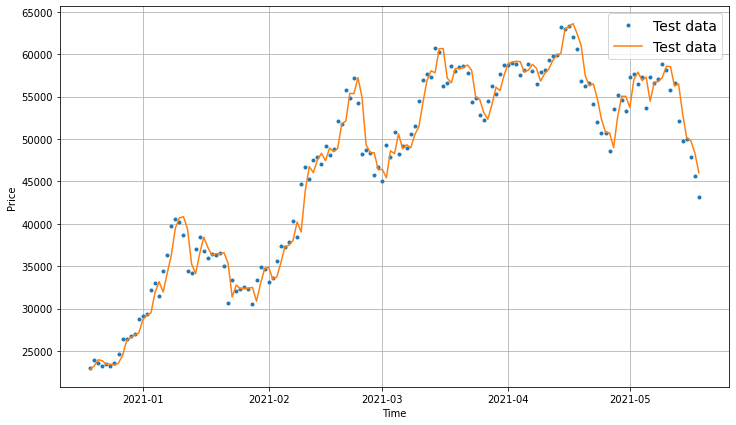

In [44]:
#Plot model 1 prediction
offset = 400
plt.figure(figsize=(12,7)) 
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_1_prediction[:, 0], start=offset, format="-", label="Test data")

## Model 2: Dense (window = 30, Horizon = 1)

In [45]:
HORIZON = 1  # Predict one step at a time 
WINDOW_SIZE = 30  # use 30 timesteps in the past 


In [46]:
#Make window data with appropiate horizon and window size
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [47]:
#Make training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, 
                                                                                labels = full_labels, 
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [48]:
#lets see three data 
for i in range(3): 
  print(f"Bitcoin prices window:{train_windows[i]} -> Horizon: {train_labels[i]}")

Bitcoin prices window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Horizon: [196.02499]
Bitcoin prices window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] -> Horizon: [198.04883]
Bitcoin prices window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
 200.70166 180.355   175.03166 177.6965  187.15983 192.75666 197.4


In [49]:
import tensorflow as tf 
from tensorflow.keras import layers 

#Set random seed 
tf.random.set_seed(42) 

#1. Construct model 
model_2 = tf.keras.Sequential([
                              layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #Linear activation is same as having no activation 
], name="model_2_dense")

#2. Compile the model 

model_2.compile(optimizer = "adam", 
                  loss = tf.keras.losses.mean_absolute_error, 
                metrics=["mae", "mse"])

# 3. Fit the model 
model_2.fit(x= train_windows, 
            y= train_labels, 
            epochs=100, 
            batch_size=128,
            verbose=1,
            validation_data =(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 47ms/step - loss: 1064.9371 - mae: 1064.9371 - mse: 4542822.5000 - val_loss: 2895.4019 - val_mae: 2895.4019 - val_mse: 19567446.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 420.6906 - mae: 420.6906 - mse: 778456.3125 - val_loss: 1432.5332 - val_mae: 1432.5332 - val_mse: 6157843.5000
Epoch 3/100
18/18 [==============================] - 1s 38ms/step - loss: 273.6108 - mae: 273.6108 - mse: 341361.0625 - val_loss: 1184.9758 - val_mae: 1184.9758 - val_mse: 4246033.0000
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 229.8812 - mae: 229.8812 - mse: 233569.3594 - val_loss: 1460.8365 - val_mae: 1460.8365 - val_mse: 5247290.5000
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 187.4495 - mae: 187.4495 - mse: 170886.5156 - val_loss: 1086.8777 - val_mae: 1086.8777 - val_mse: 3473264.7500
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss:

In [50]:
# evaluate the model 
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 632.3505 - mae: 632.3505 - mse: 1350411.3750


[632.3504638671875, 632.3504638671875, 1350411.375]

In [51]:
# Load in the best performing model 
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 630.8033 - mae: 630.8033 - mse: 1354821.6250


[630.8032836914062, 630.8032836914062, 1354821.625]

In [52]:
# Get forecast prediction 
model_2_prediction = model_2.predict(test_windows)
model_2_prediction[:5]

array([[7543.001 ],
       [7556.1143],
       [7537.906 ],
       [7449.207 ],
       [7189.9883]], dtype=float32)

In [53]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = tf.squeeze(model_2_prediction))
model_2_results

{'mae': 630.8032,
 'mape': 2.7796667,
 'mase': 1.0676831,
 'mse': 1354821.8,
 'rmse': 1163.9681}

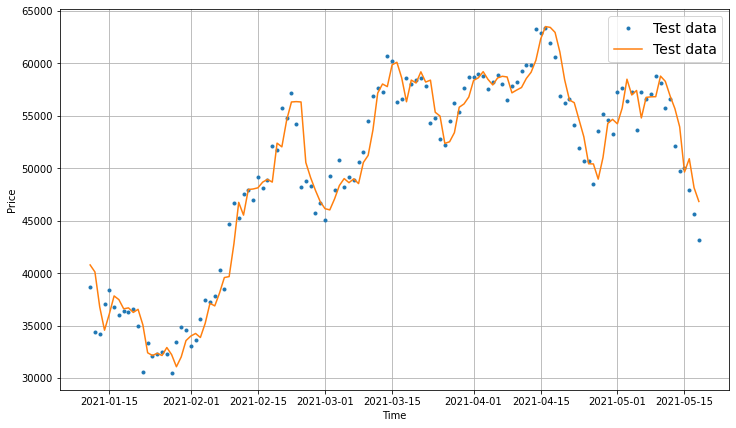

In [54]:
#Plot model 1 prediction
offset = 400
plt.figure(figsize=(12,7)) 
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_2_prediction[:, 0], start=offset, format="-", label="Test data")

## Model 2: Dense (Window:30, Horizon: 7)

In [55]:
HORIZON = 7 
WINDOW_SIZE = 30 

full_windows, full_labels = make_windows(prices, horizon= HORIZON, window_size = WINDOW_SIZE)
len(full_windows), len(full_labels)

(2751, 2751)

In [56]:
#Make training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, 
                                                                                labels = full_labels, 
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [57]:
import tensorflow as tf 
from tensorflow.keras import layers 

#Set random seed 
tf.random.set_seed(42) 

#1. Construct model 
model_3 = tf.keras.Sequential([
                              layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #Linear activation is same as having no activation 
], name="model_3_dense")

#2. Compile the model 

model_3.compile(optimizer = "adam", 
                  loss = tf.keras.losses.mean_absolute_error, 
                metrics=["mae", "mse"])

# 3. Fit the model 
model_3.fit(x= train_windows, 
            y= train_labels, 
            epochs=100, 
            batch_size=128,
            verbose=1,
            validation_data =(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 44ms/step - loss: 1438.0601 - mae: 1438.0601 - mse: 9678379.0000 - val_loss: 2992.5234 - val_mae: 2992.5234 - val_mse: 23649860.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 561.0258 - mae: 561.0258 - mse: 1391133.6250 - val_loss: 2527.2437 - val_mae: 2527.2437 - val_mse: 17928038.0000
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 439.0709 - mae: 439.0709 - mse: 889382.1875 - val_loss: 2125.8508 - val_mae: 2125.8508 - val_mse: 13159095.0000
Epoch 4/100
18/18 [==============================] - 1s 74ms/step - loss: 390.0160 - mae: 390.0160 - mse: 711626.4375 - val_loss: 2003.1595 - val_mae: 2003.1595 - val_mse: 11794315.0000
Epoch 5/100
18/18 [==============================] - 1s 44ms/step - loss: 353.4758 - mae: 353.4758 - mse: 599935.2500 - val_loss: 1783.8617 - val_mae: 1783.8617 - val_mse: 9722761.0000
Epoch 6/100
18/18 [==============================] - 1s 35ms/step -

In [58]:
#Evaluate the model 
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1306.4872 - mae: 1306.4872 - mse: 5686010.0000


[1306.4871826171875, 1306.4871826171875, 5686010.0]

In [59]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1289.9519 - mae: 1289.9519 - mse: 5686467.5000


[1289.951904296875, 1289.951904296875, 5686467.5]

In [60]:
#Make prediction with model 3 
model_3_preds = model_3.predict(test_windows)
model_3_preds[:5]

array([[7541.493 , 7398.733 , 7469.902 , 7406.1304, 7380.5503, 7419.8545,
        7478.2915],
       [7538.3623, 7425.5254, 7426.7793, 7604.7153, 7526.7866, 7428.6064,
        7572.329 ],
       [7586.7354, 7423.7734, 7491.3022, 7660.6567, 7600.381 , 7449.154 ,
        7657.573 ],
       [7403.3125, 7357.502 , 7356.925 , 7503.668 , 7258.511 , 7298.3896,
        7585.3647],
       [7267.456 , 7237.2817, 7237.013 , 7281.935 , 7299.452 , 7214.3003,
        7425.0864]], dtype=float32)

In [61]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([ 159.36168 ,  244.21736 ,  352.82095 ,  259.06332 ,  238.8217  ,
         246.82268 ,  234.21812 ,  309.11594 ,  188.6137  ,  236.29967 ,
         295.08014 ,  455.67758 ,  162.58768 ,  134.6416  ,  148.06068 ,
          79.04994 ,   95.950264,   58.8065  ,  102.05657 ,   56.952496,
         115.154854,  121.06194 ,  105.48626 ,  155.58119 ,  140.72168 ,
         247.67969 ,  418.25424 ,  584.93964 ,  554.62366 ,  570.6382  ,
         541.57245 ,  442.18576 ,  243.2567  ,  282.81863 ,  380.2818  ,
         459.49057 ,  465.0848  ,  550.6831  ,  523.66125 ,  119.38002 ,
         272.0872  ,  231.85533 ,  404.02484 ,  505.23648 ,  340.25543 ,
         240.10617 ,  310.25363 ,  309.87137 ,  376.83148 ,  523.0972  ,
         686.6214  ,  838.44073 ,  655.74664 ,  325.2973  ,  151.62375 ,
         186.55357 ,  209.62234 ,  235.48186 ,  314.98926 ,  408.72852 ,
         586.16766 ,  439.31488 ,  435.67328 ,  346.84625 ,  240.52371 ,
         217.73787 ,  285.49106 ,  314.58676

In [62]:
# Create a function to take in model Prediction and truth values and return evaluation metrics 
def evaluate_preds(y_true, y_pred): 
  #Make sure float32 data types (for metric calculation)
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32) 

  #Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #Account for different sized matrices (for longer horizon, we want to reduce matrix to a single values)
  if mae.ndim > 0: 
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(), 
          "rmse": rmse.numpy(), 
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [63]:
model_3_results = evaluate_preds(y_true= tf.squeeze(test_labels), y_pred= tf.squeeze(model_3_preds))
model_3_results

{'mae': 1289.952,
 'mape': 5.5243073,
 'mase': 2.205551,
 'mse': 5686468.0,
 'rmse': 1478.4778}

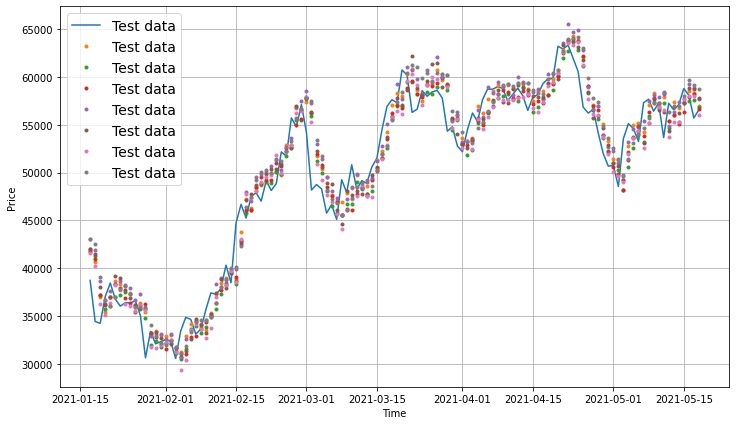

In [64]:
#Plot model 1 prediction
offset = 400
plt.figure(figsize=(12,7)) 
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = model_3_preds, start=offset, label="Test data")

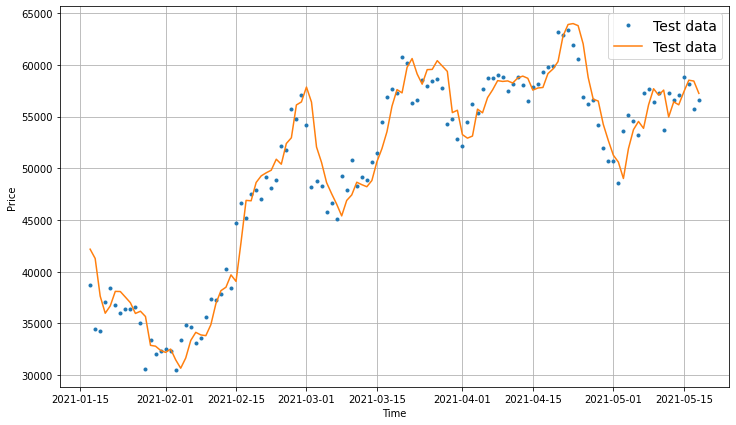

In [65]:
#Plot model 1 prediction
offset = 400
plt.figure(figsize=(12,7)) 
plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps = X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="Test data")

## Which of our model is performing best so far? 

So, we have trained a few models, let's compare them and see hows they've gone.

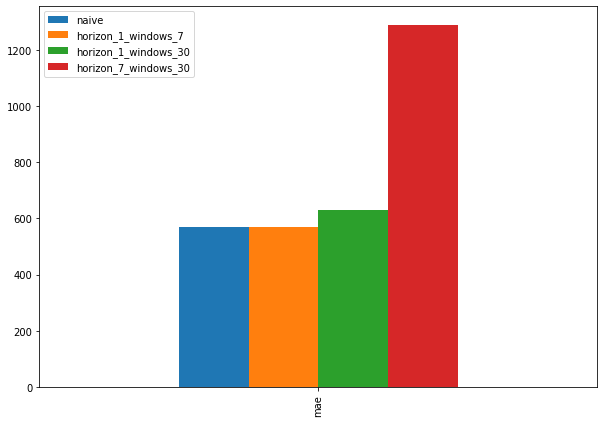

In [66]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_windows_7": model_1_results["mae"],
              "horizon_1_windows_30": model_2_results["mae"], 
              "horizon_7_windows_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind="bar")

https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D 



In [67]:
HORIZON = 1 #predict next day 
WINDOW_SIZE = 7 

In [68]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [69]:
#Create windowed data 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels) 
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

To use the Conv1D layer, we need an inputs shape of: (`batch_size`, `timesteps`, `input_dim`)...

However our data isn't in that shape yet. 

In [70]:
#Check data input shape 
train_windows[0].shape #returns (WINDOW_SIZE,)

(7,)

In [71]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [72]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension to the 'input'

In [73]:
#Test out our lambda layer 
print(f"Original Shape: {x.shape}") #Window shape 
print(f"Expanded shape: {expand_dims_layer(x).shape}") #output shape 
print(f"Original Value with expanded shape:{expand_dims_layer(x)}")

Original Shape: (7,)
Expanded shape: (7, 1)
Original Value with expanded shape:[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [74]:
tf.random.set_seed(42)

#create conv1d model 
model_4 = tf.keras.Sequential([
                layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                layers.Conv1D(filters= 128, kernel_size = 5, strides = 1, padding="causal", activation="relu"),
                layers.Dense(HORIZON)
], name="model_4_conv1d")

#compile model 
model_4.compile(loss="mae", optimizer = tf.keras.optimizers.Adam())

# fit the model 

model_4.fit(train_windows, 
            train_labels, 
            batch_size = 128, 
            epochs=100, 
            verbose = 1, 
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 8s 76ms/step - loss: 1215.9006 - val_loss: 2202.6687
Epoch 2/100
18/18 [==============================] - 1s 49ms/step - loss: 280.5411 - val_loss: 1434.7140
Epoch 3/100
18/18 [==============================] - 1s 51ms/step - loss: 196.2583 - val_loss: 1256.8219
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 181.7374 - val_loss: 1014.4604
Epoch 5/100
18/18 [==============================] - 1s 50ms/step - loss: 172.9567 - val_loss: 965.5759
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 170.2419 - val_loss: 965.6066
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 167.2111 - val_loss: 966.8497
Epoch 8/100
18/18 [==============================] - 1s 49ms/step - loss: 164.2814 - val_loss: 918.4393
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 160.9479 - val_loss: 973.4053
Epoch 10/100
18/18 [==============================] - 1s 49ms/

In [75]:

model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [76]:
#evaluate the model

model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 596.7827


596.78271484375

In [77]:
#load back in best performing Conv1D and evaluate 
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 575.1335


575.1334838867188

In [78]:
#Make predictions 
model_4_preds = model_4.predict(test_windows)
model_4_preds[:10]

array([[[8756.23  ]],

       [[8697.727 ]],

       [[8546.184 ]],

       [[8480.063 ]],

       [[8531.184 ]],

       [[8290.775 ]],

       [[8142.1045]],

       [[8085.743 ]],

       [[7722.7314]],

       [[7336.1177]]], dtype=float32)

In [79]:
#Evaluate predictions 
model_4_results = evaluate_preds(y_true= tf.squeeze(test_labels), 
                                 y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 575.1335,
 'mape': 2.5733986,
 'mase': 1.0038091,
 'mse': 1197862.6,
 'rmse': 1094.4691}

## Model 5: LSTM

Let's build the LSTM model with same data as previously.

In [80]:
tf.random.set_seed(42) 

#Let's build model with Functional api 

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x) 
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, output, name="model_5_lstm") 

model_5.compile(loss="mae", optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows, 
            train_labels, 
            batch_size = 128, 
            epochs=100, 
            verbose = 1, 
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2387.3342INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 4s 150ms/step - loss: 2336.7212 - val_loss: 9045.6035
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 723.8486 INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 155ms/step - loss: 711.9308 - val_loss: 1442.2871
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 239.7612INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 239.2708 - val_loss: 1320.5254
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 187.3112INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 139ms/step - loss: 182.9835 - val_loss: 981.6747
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 172.5035INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 174.9795 - val_loss: 959.8746
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 177.7630INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 157ms/step - loss: 176.4473 - val_loss: 950.2917
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 176.7048 - val_loss: 1005.5700
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 167.4149 - val_loss: 962.6767
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 165.1346 - val_loss: 1007.8981
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 167.6294 - val_loss: 1009.1493
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 166.8738INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 165.9615 - val_loss: 922.4389
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 166.8803INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 136ms/step - loss: 166.1708 - val_loss: 912.7910
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 163.5754INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 162.9857 - val_loss: 906.2006
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 161.5913 - val_loss: 913.2524
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 158.0985 - val_loss: 920.8420
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 159.5283INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 168ms/step - loss: 158.4031 - val_loss: 905.5132
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 154.6910INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 143ms/step - loss: 155.9547 - val_loss: 871.4522
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 155.1698 - val_loss: 873.4503
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 152.8280 - val_loss: 913.1996
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 154.8620INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 135ms/step - loss: 154.0173 - val_loss: 854.1241
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 152.8354INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 152ms/step - loss: 151.9810 - val_loss: 830.6902
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 148.6223 - val_loss: 880.1916
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 147.4644 - val_loss: 878.3856
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 145.0904 - val_loss: 841.6723
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 145.6729INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 145.3143 - val_loss: 798.7645
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 142.5968INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 142.1881 - val_loss: 790.5482
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 141.5711 - val_loss: 906.3041
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 142.2048INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 135ms/step - loss: 141.7803 - val_loss: 779.0469
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 137.8382 - val_loss: 826.8504
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 136.5561 - val_loss: 780.6615
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 137.7299INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 158ms/step - loss: 135.9364 - val_loss: 756.9119
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 135.5092INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 138ms/step - loss: 135.8566 - val_loss: 751.7798
Epoch 33/100
18/18 [==============================] - 0s 9ms/step - loss: 135.0988 - val_loss: 758.3214
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 136.2527INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 136.0903 - val_loss: 735.0709
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 131.9063 - val_loss: 738.7091
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0909INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 135ms/step - loss: 130.6139 - val_loss: 731.7086
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 152.9332INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 159ms/step - loss: 150.3801 - val_loss: 718.5421
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 128.2605 - val_loss: 724.5986
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 128.2583INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 139ms/step - loss: 127.2001 - val_loss: 713.4073
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 125.6740INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 126.6686 - val_loss: 702.1061
Epoch 41/100
18/18 [==============================] - 0s 9ms/step - loss: 126.8580 - val_loss: 704.5472
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 125.3855 - val_loss: 739.6730
Epoch 43/100
16/18 [=========================>....] - ETA: 0s - loss: 127.1443INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 126.4163 - val_loss: 689.1602
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 125.0489 - val_loss: 722.1752
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 123.0148 - val_loss: 707.7032
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 122.7505INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 159ms/step - loss: 122.5035 - val_loss: 676.3026
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 121.7316INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 121.2718 - val_loss: 672.2407
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 123.1524 - val_loss: 783.8877
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 127.5400INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 126.2957 - val_loss: 666.4952
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 122.1675 - val_loss: 701.2913
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 124.3943INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 161ms/step - loss: 124.2146 - val_loss: 664.3631
Epoch 52/100
18/18 [==============================] - 0s 10ms/step - loss: 122.8422 - val_loss: 745.8642
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 126.3806INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 139ms/step - loss: 126.6225 - val_loss: 655.8232
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 124.1256 - val_loss: 670.5493
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 126.3667 - val_loss: 664.3867
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 118.5741 - val_loss: 686.7986
Epoch 57/100
15/18 [========================>.....] - ETA: 0s - loss: 125.6572INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 136ms/step - loss: 122.9106 - val_loss: 649.9595
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 117.4704INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 137ms/step - loss: 117.5861 - val_loss: 647.2559
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 118.2144INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 158ms/step - loss: 118.1674 - val_loss: 644.8066
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 120.6494INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 120.6697 - val_loss: 642.5886
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 118.4601 - val_loss: 642.9163
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 121.6432 - val_loss: 643.7953
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 119.1235INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 138ms/step - loss: 118.4376 - val_loss: 639.0661
Epoch 64/100
15/18 [========================>.....] - ETA: 0s - loss: 115.0994INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 139ms/step - loss: 117.4628 - val_loss: 635.9095
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 118.5059INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 166ms/step - loss: 116.2816 - val_loss: 633.7571
Epoch 66/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8886INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 115.9425 - val_loss: 631.9549
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 113.1498INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 116.4699 - val_loss: 631.2153
Epoch 68/100
18/18 [==============================] - 0s 9ms/step - loss: 115.4995 - val_loss: 639.0834
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1090 - val_loss: 643.1538
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 116.8198 - val_loss: 678.7923
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 117.3374 - val_loss: 631.2849
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 116.2928INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 141ms/step - loss: 115.7911 - val_loss: 622.3685
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 118.7361 - val_loss: 625.6614
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7681 - val_loss: 627.7098
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 120.3514INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 165ms/step - loss: 114.1627 - val_loss: 622.1952
Epoch 76/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0394 - val_loss: 624.9930
Epoch 77/100
16/18 [=========================>....] - ETA: 0s - loss: 112.4919INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 141ms/step - loss: 113.8231 - val_loss: 620.3487
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 115.1874INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 139ms/step - loss: 114.0260 - val_loss: 616.2192
Epoch 79/100
18/18 [==============================] - 0s 10ms/step - loss: 113.5140 - val_loss: 624.7553
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 119.0085 - val_loss: 631.1695
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 121.2349 - val_loss: 707.7242
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 117.8639 - val_loss: 629.5108
Epoch 83/100
15/18 [========================>.....] - ETA: 0s - loss: 114.1114INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 157ms/step - loss: 114.5529 - val_loss: 615.1636
Epoch 84/100
16/18 [=========================>....] - ETA: 0s - loss: 114.1469INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 113.5977 - val_loss: 612.2022
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2843 - val_loss: 618.9429
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6016INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 136ms/step - loss: 113.1863 - val_loss: 610.5975
Epoch 87/100
18/18 [==============================] - 0s 10ms/step - loss: 113.9207 - val_loss: 628.0419
Epoch 88/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6350 - val_loss: 630.2177
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 113.1746 - val_loss: 662.0069
Epoch 90/100
16/18 [=========================>....] - ETA: 0s - loss: 113.6046INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 140ms/step - loss: 114.9012 - val_loss: 608.0988
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7626 - val_loss: 612.2397
Epoch 92/100
18/18 [==============================] - 0s 9ms/step - loss: 111.3108 - val_loss: 608.3987
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 113.4207 - val_loss: 627.7930
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 114.9248 - val_loss: 639.6974
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 111.6361INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 3s 157ms/step - loss: 114.7963 - val_loss: 603.1116
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6617 - val_loss: 607.8137
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4661 - val_loss: 641.9933
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3020 - val_loss: 657.0794
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2119INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


18/18 [==============================] - 2s 138ms/step - loss: 112.6966 - val_loss: 599.8253
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6029 - val_loss: 700.8041


In [81]:
#Load in best version of model 5 and evaluate on test data 
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 599.8253


599.8253173828125

In [82]:
#Make prediction with our LSTM model 
model_5_preds = model_5.predict(test_windows)
model_5_preds[:10]

array([[8774.361 ],
       [8733.715 ],
       [8537.717 ],
       [8499.416 ],
       [8530.363 ],
       [8322.081 ],
       [8146.4526],
       [8096.554 ],
       [7776.172 ],
       [7344.6626]], dtype=float32)

In [83]:
#Result 
model_5_result = evaluate_preds(y_true = tf.squeeze(test_labels), 
                                y_pred = tf.squeeze(model_5_preds))
model_5_result

{'mae': 599.8253,
 'mape': 2.6950874,
 'mase': 1.046905,
 'mse': 1281321.8,
 'rmse': 1131.9548}

> 🔑 **Note:** Because Neural network are such powerful algorithm, they can be used for almost any problem, however, that doesn't mean they'll achieve performance or usable result. You're probably starting to clue onto this now. 

## Make a Multivariate time series dataset

Before we add a feature to our time series dataset, What is a feature we can use?

One feature we could add is wheather or not Daniel Bourke tweeted on that day... 

* day 1 - 0 
* day 2 - 1
* day 3 - 0

What's a better feature to use?

> **Bitcoin having:** A Bitcoin halving is when the payout for mining a new block is halved, and this happens after every 210,000 blocks (approximately four years).  The first of which happened in 2012, and the next will occur in 2024. 

In [84]:
#Lets make  a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [85]:
# Lets add the bitcoin halving events to our dataset 
block_reward_1 = 50 # 3 January 2009 - This block reward isn't in our dataset 
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016  
block_reward_4 = 6.25 # 18 May 2020

#Block reward dates 
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [86]:
#Create date ranges of where specific block reward values should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days 
block_reward_2_days, block_reward_3_days 

(1012, 2421)

In [87]:
#Add in a block reward column 
bitcoin_prices_block = bitcoin_prices.copy() 
bitcoin_prices_block["block_reward"] = None 

#Add in block reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2 
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days, -1] = block_reward_3 
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4



In [88]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [89]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


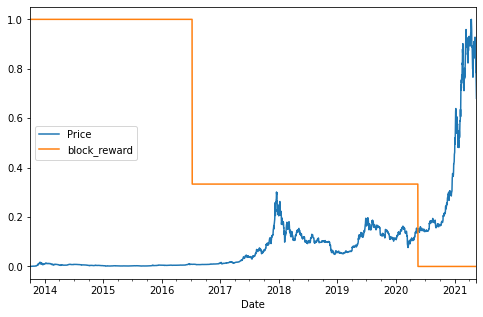

In [90]:
#Plot the block reward vs price over time 
from sklearn.preprocessing import minmax_scale

scaled_priceblock_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), 
                                            columns = bitcoin_prices_block.columns, 
                                    index = bitcoin_prices_block.index) 
scaled_priceblock_df.plot(figsize = (8, 5 ))


## Making a windowed dataset with pandas 

Previously, we've turned our univariate time series into windowed dataset using the helper function above. 

However, Since we've got Multivariate data, these function won't work. 

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

SettingWithCopyWarning: https://www.dataquest.io/blog/settingwithcopywarning/

In [91]:
#Setup dataset hyperparamters
HORIZON = 1
WINDOW_SIZE = 7


In [92]:
#Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy() 

#Add windowed columns
for i in range(WINDOW_SIZE): 
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


What we have done is created a way to window our dataset directly from a pandas dataframe. 

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8] 
[2, 3, 4, 5, 6, 7, 8 block_reward] -> [9] 
```

In [93]:
# Create X(windows) and Y (horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [94]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [95]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [96]:
#Make train and test sets using indexing 

split_size = int(len(X) * 0.8) 
X_train, y_train = X[:split_size], y[:split_size] 
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [97]:
X_train.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [98]:
y_train.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

## Model 6: Dense (same as model 1 but Multivariate) 

In [99]:
tf.random.set_seed(42) 

model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"), 
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

#compile 
model_6.compile(loss="mae", 
                optimizer = tf.keras.optimizers.Adam())

model_6.fit(X_train, 
            y_train, 
            validation_data = (X_test, y_test), 
            epochs = 100, 
            batch_size = 128,
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 708.7571 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 708.7571 - val_loss: 2263.3032
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 216.4036INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 60ms/step - loss: 209.3598 - val_loss: 882.9350
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 155.8663INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 155.8663 - val_loss: 819.8377
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 146.5632INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 146.5632 - val_loss: 799.7484
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 132.3965INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 132.3965 - val_loss: 693.0830
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 125.7849INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 125.7849 - val_loss: 659.4672
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 122.0054 - val_loss: 715.4888
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 119.8677INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 120.0701 - val_loss: 636.3212
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8690 - val_loss: 813.5287
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6461 - val_loss: 798.1339
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 132.8748 - val_loss: 954.1594
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 141.3553 - val_loss: 760.2549
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 121.1712 - val_loss: 744.8667
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9032 - val_loss: 676.4730
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 128.2026 - val_loss: 650.1194
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 121.0512INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 120.1517 - val_loss: 607.5732
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3910 - val_loss: 613.7141
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 111.6833INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 111.6833 - val_loss: 594.0024
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 115.6327INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 115.6327 - val_loss: 587.0794
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1031 - val_loss: 610.2460
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3326 - val_loss: 746.6410
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 119.9599INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 119.9599 - val_loss: 584.4871
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9238 - val_loss: 633.5179
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8530 - val_loss: 744.4088
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2092 - val_loss: 621.2407
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4809 - val_loss: 616.5062
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2301 - val_loss: 586.4800
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 107.8962INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 107.8962 - val_loss: 577.8256
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8487 - val_loss: 605.5060
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9190 - val_loss: 622.7371
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3989 - val_loss: 583.1697
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 110.4221INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 110.4221 - val_loss: 574.4394
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4232 - val_loss: 584.2971
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3021 - val_loss: 681.6038
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6243 - val_loss: 685.6689
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9770 - val_loss: 589.9265
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6149 - val_loss: 610.3577
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3095 - val_loss: 629.7596
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1903 - val_loss: 576.9446
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4169 - val_loss: 577.9578
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 59ms/step - loss: 111.5022 - val_loss: 572.1923
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 104.9377INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 105.0783 - val_loss: 570.3768
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0239 - val_loss: 583.6284
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0586 - val_loss: 632.0328
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8051 - val_loss: 597.8694
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 105.1643INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 105.1643 - val_loss: 570.2969
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7897 - val_loss: 863.3900
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 124.0439 - val_loss: 797.6609
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7918 - val_loss: 648.4115
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 119.4072 - val_loss: 705.8706
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6556 - val_loss: 610.5174
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0141 - val_loss: 603.0492
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0033 - val_loss: 744.6339
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 121.3403 - val_loss: 889.7557
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 12

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 104.4472 - val_loss: 568.4494
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8396 - val_loss: 614.3591
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3847 - val_loss: 675.6922
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5268 - val_loss: 575.9052
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8737 - val_loss: 636.9813
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 104.6579 - val_loss: 572.9106
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 103.8628 - val_loss: 568.5963
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9379 - val_loss: 568.8135
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7746 - val_loss: 610.8448
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 11

In [100]:
#Evaluate model 
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 865.3055


865.3054809570312

In [101]:
#load model and evaluate
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.4495


568.449462890625

In [102]:
#Predictions 

model_6_preds = model_6.predict(X_test)
model_6_preds[:10]

array([[8813.428],
       [8767.832],
       [9045.074],
       [8723.28 ],
       [8713.941],
       [8744.134],
       [8651.524],
       [8490.181],
       [8448.835],
       [8518.018]], dtype=float32)

In [103]:
model_6_results = evaluate_preds(y_true = tf.squeeze(y_test), 
                                 y_pred = tf.squeeze(model_6_preds, axis=1))

model_6_results

{'mae': 568.4494,
 'mape': 2.5558894,
 'mase': 0.9986082,
 'mse': 1162442.5,
 'rmse': 1078.1663}

## Model 7: N-BEATS Algorithm 

Let's now try build the biggest timer series model we've built so far. 

More specifically, we're going to be replicating the algorithm in figure 1 from the following paper :https://arxiv.org/abs/1905.10437

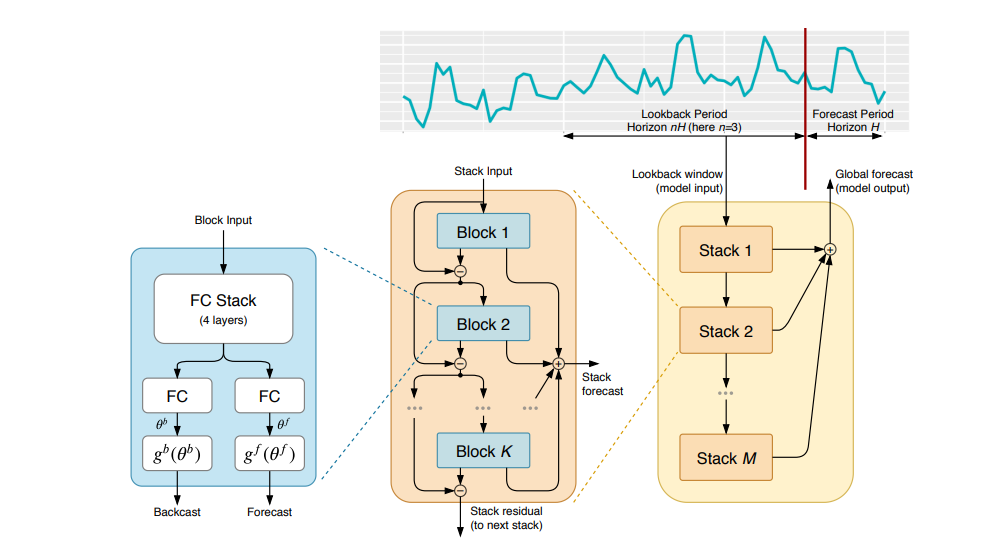

Why? 

* This will allow us to practice replicating a paper with tensorflow code
* We will see how to use Tensorflow layer subclassing (to make own custom layer) 
* Get experience using the functional API to create a custom architecture
* Potentially get state of the art results on our problem.

## Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in tensorflow, we've got to create it. 

To create custom layer and models in Tensorflow we can use sub classing:
https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [104]:
import tensorflow as tf 

class NBeatsBlock(tf.keras.layers.Layer): 
  def __init__(self,
               input_size: int, 
               theta_size: int, 
               horizon: int, 
               n_neurons: int, 
               n_layers: int, 
               **kwargs): 
    super().__init__(**kwargs)
    self.input_size = input_size 
    self.theta_size = theta_size 
    self.horizon = horizon 
    self.n_neurons = n_neurons 
    self.n_layers = n_layers 

    #Block contains stack of 4 fullyconnected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)] 

    #Output of block is a theta layer with linear activation 
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): 
    x = inputs

    for layer in self.hidden: 
      x = layer(x)
    theta = self.theta_layer(x)

    #output the backcast and the forecast from theta 
    backcast, forecast = theta[:, : self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

In [105]:
WINDOW_SIZE = 7 
HORIZON = 1

In [106]:
#Set up dummy NBeatsblock layer to represent inputs and outputs 
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE, 
                                       theta_size = WINDOW_SIZE + HORIZON, 
                                       horizon = HORIZON, 
                                       n_neurons = 128, 
                                       n_layers= 4)

In [107]:
#Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) #output shape to the model has to reflect dense layer input requirements(ndim=2)


In [108]:
#Pass dummy inputs to dummy NBeatsBlock layer 
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

#These are the activation outputs of the theta layer (they we'll be random due to no training of the module)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.4634872   0.10944451 -0.4335534   0.93602407 -0.35703534 -0.17927621
 -0.34048355]
Forecast: -0.4397900700569153


### Preparing data for the N-Beats Algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide: 
https://www.tensorflow.org/guide/data_performance

In [109]:
HORIZON = 1 
WINDOW = 7 

In [110]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series) 
bitcoin_prices.head() 

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [111]:
# Add windowed columns 
bitcoin_prices_nbeats = bitcoin_prices.copy() 
for i in range(WINDOW_SIZE): 
  bitcoin_prices_nbeats[f'Prices+{i+1}'] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head() 

,Price,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [112]:
#Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#Make train & test split
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [113]:
#Time to make our dataset performant using tf.data API 
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train) 

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

#Combine labels and features by zipping together -> (features, labels) 
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)) 
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)) 

#Batch and prefetch 
BATCH_SIZE = 124 
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset 

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for the N-BEATS Algorithm 

The N-BEATS alogorithm has a fair number of parameters, many of them can be found in Table 18. https://arxiv.org/abs/1905.10437

In [114]:
#Values from N-BEATS paper 
N_EPOCHS = 5000 
N_NEURONS = 512 
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON 

INPUT_SIZE, THETA_SIZE 

(7, 8)

### Getting ready for Residual Connections 

Before we can craft our N-BEATS Model, we need two layers for the residual connections (subtract and add) 

The N-BEATS Algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS Paper)

For more on residual connections see: 
https://en.wikipedia.org/wiki/Residual_neural_network

In [115]:
#Make tensors 
tensor_1 = tf.range(10) + 10 
tensor_2 = tf.range(10) 

#Subtract 
subtracted = layers.subtract([tensor_1, tensor_2])

#Add 
added = layers.add([tensor_1, tensor_2]) 

print(f"Input Tensor: {tensor_1.numpy(), tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added:{added.numpy()}") 

Input Tensor: (array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS Algorithm 

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the keras functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loops to create stacks of block layer. 
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which returns backcasts and block-level forecast.
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks: 
  * Early stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce Lr on plateau - If a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance).

In [116]:
%%time 

tf.random.set_seed(42) 

# 1. Setup and instance of NBeatsBlock 
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE, 
                                 theta_size = THETA_SIZE, 
                                 horizon = HORIZON, 
                                 n_neurons = N_NEURONS, 
                                 n_layers = N_LAYERS, 
                                 name = "Initialblock")

# 2. Create Input to stack 
stack_input = layers.Input(shape=(INPUT_SIZE), name = "stack_input") 

# 3. Create Initial backcast and forecast inputs (backward prediction + horizon prediction) 
residuals, forecast = nbeats_block_layer(stack_input) 

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created in (3) 

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
                                 input_size = INPUT_SIZE, 
                                 theta_size = THETA_SIZE, 
                                 horizon = HORIZON, 
                                 n_neurons = N_NEURONS, 
                                 n_layers = N_LAYERS, 
                                 name = f"NBeatsBlock_{i}"
  )(residuals) #Functional API pass the residuals from previous layer 

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name = f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast ], name = f"add_{i}")

#7. Put the stack model together 
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "Model_7_NBEATS")

model_7.compile(loss="mae", 
                optimizer = tf.keras.optimizers.Adam(), 
                )

#8. Fit the model 
model_7.fit(train_dataset, 
            epochs = N_EPOCHS, 
            validation_data= test_dataset,
            verbose =0, 
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                          patience = 200, 
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", 
                                                              patience = 100, 
                                                              factor = 0.2, 
                                                              min_lr = 0.001, 
                                                              verbose = 1)])

CPU times: user 5min 49s, sys: 8.25 s, total: 5min 57s
Wall time: 6min 56s


In [117]:
# Evaluate model 7 on the test dataset 

model_7.evaluate(test_dataset)

5/5 [==============================] - 0s 18ms/step - loss: 587.3761


587.3760986328125

In [118]:
# Make predictions with N-BEATS model 

model_7_preds = model_7.predict(test_dataset) 
model_7_preds[:5]

array([[8931.704],
       [8815.34 ],
       [8988.811],
       [8772.03 ],
       [8754.611]], dtype=float32)

In [119]:
#Evaluate N-BEATS model preds 
model_7_results = evaluate_preds(y_true = y_test, 
                                 y_pred = tf.squeeze(model_7_preds))
model_7_results

{'mae': 587.37604,
 'mape': 2.671491,
 'mase': 1.031857,
 'mse': 1223197.9,
 'rmse': 1105.9828}

In [120]:
model_1_results

{'mae': 570.3397,
 'mape': 2.5392222,
 'mase': 0.99544233,
 'mse': 1180294.5,
 'rmse': 1086.4136}

Woah...even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of small networks as well as the fact that not all larger models are better suited for a certain type of data.

### Plot the N-BEATS model 


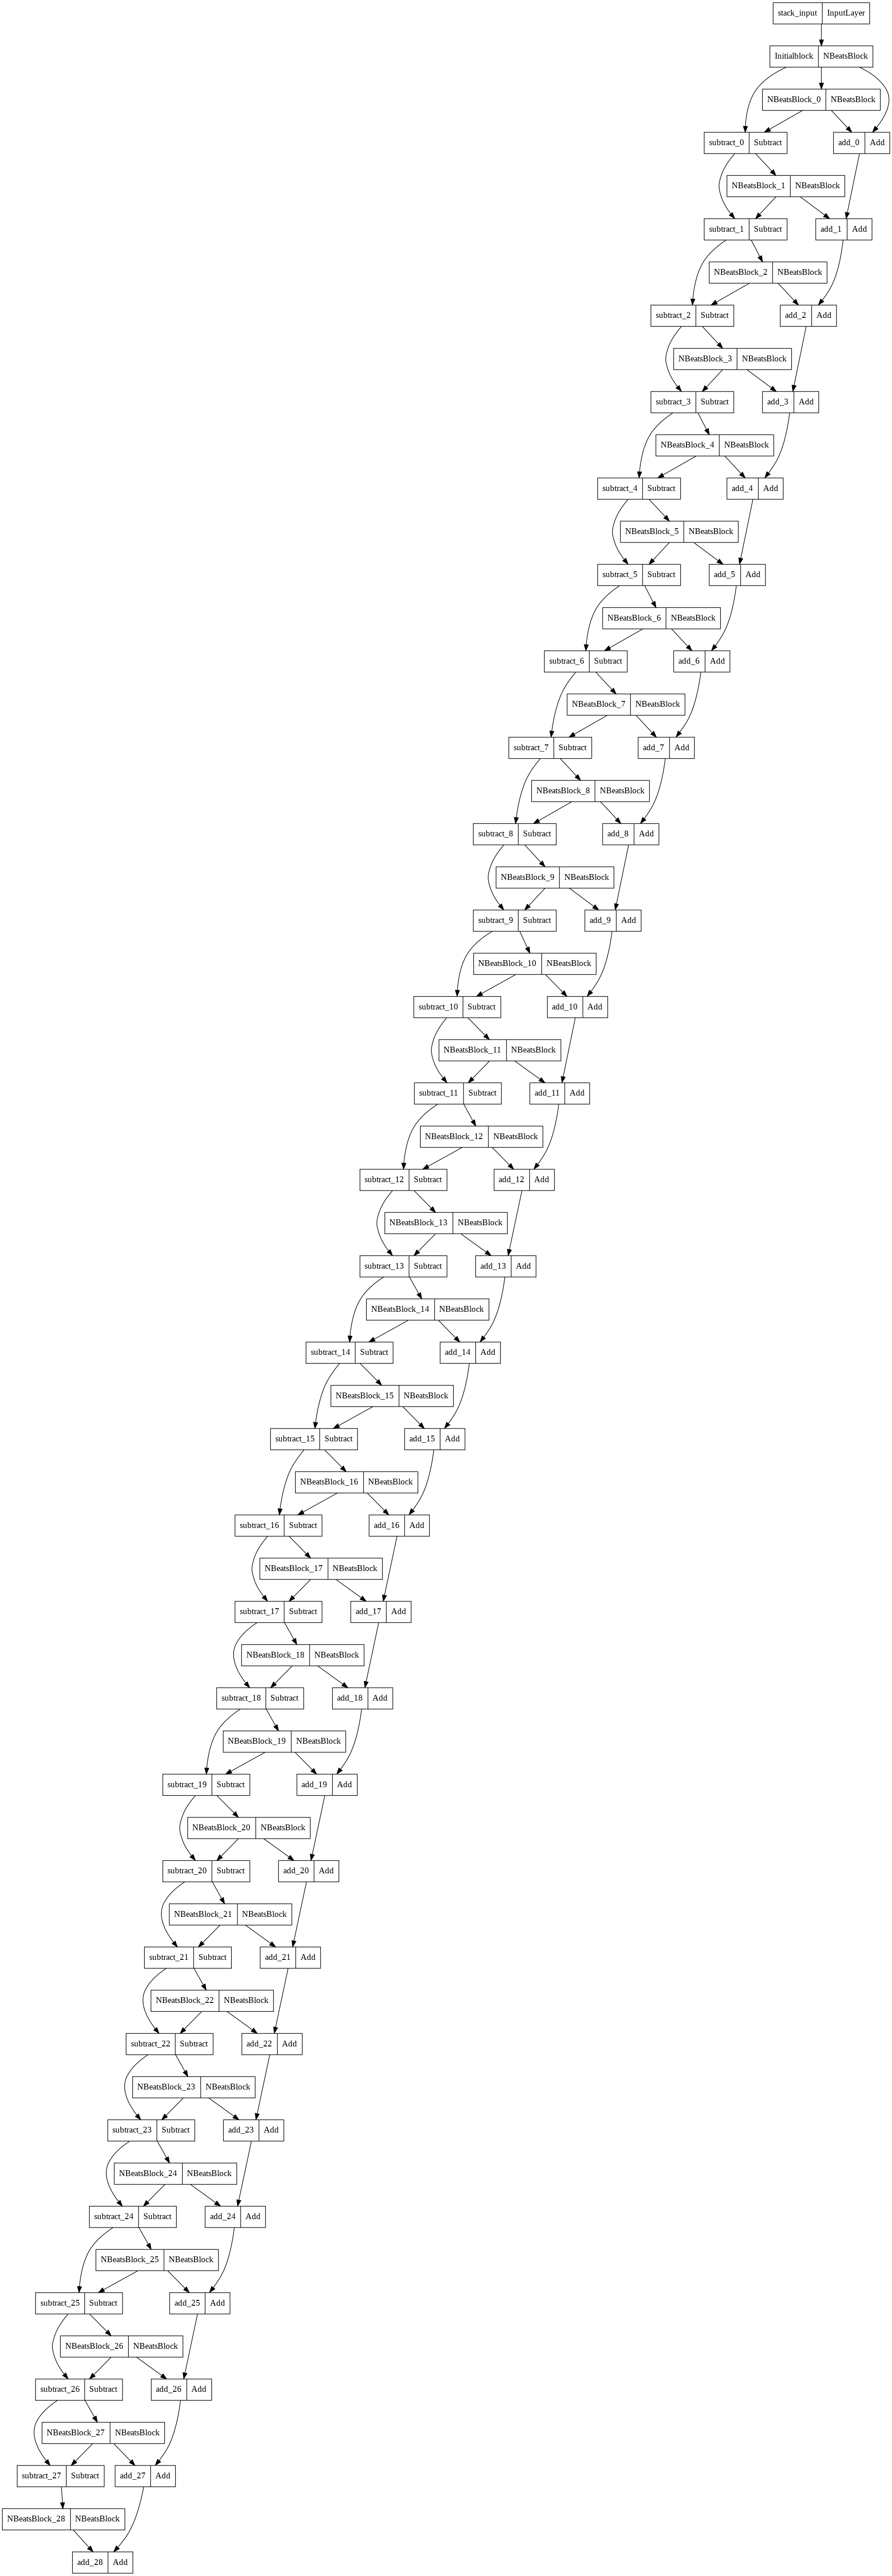

In [121]:
from tensorflow.keras.utils import plot_model 

plot_model(model_7)

## Model 8: Creating an emsemble (Stacking different models together) 

An ensemble leverages the wisdom of the crowd effect. 

It combines many *different* models to predict a common goal. 

In [122]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)



In [123]:
def get_ensemble_models(horizon = HORIZON, 
                        train_data = train_dataset, 
                        test_data = test_dataset, 
                        num_iter = 10, 
                        num_epochs = 1000, 
                        loss_fns = ["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss. 

  For example, if num_iter = 10, a list of 30 trained models will be returned:
  10 * len(["mae","mse","mape"])
  """
  # Make empty list for trained ensemble models
  ensemble_models = [] 

  #Create num_iter number of models per loss function
  for i in range(num_iter): 
    # Build and fit a new model with a different loss function 
    for loss_function in loss_fns: 
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model_number: {i}")

      #Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
                    layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"), 
                    layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"), 
                    layers.Dense(HORIZON, activation="linear")
      ])

      #Compile simple model with loss function 
      model.compile(loss=loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ["mae", "mse"])
      
      #fit the current model 
      model.fit(train_data, 
                epochs = num_epochs,
                verbose =0, 
                validation_data = test_data, 
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                               patience = 200, 
                                                               restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                  patience = 100,
                                                                  verbose=1)])
      #Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [124]:
%%time 

ensemble_models = get_ensemble_models(num_iter = 5, 
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model_number: 0

Epoch 255: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 378: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 478: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model_number: 0

Epoch 347: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 684: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 784: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model_number: 0

Epoch 406: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 506: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model_number: 1

Epoch 246: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 364:

### Make predictions with our ensemble model 

In [125]:
ensemble_models

In [126]:
#create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data): 
  ensemble_preds = []
  for model in ensemble_models: 
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [127]:
#create a list of ensemble prediction 
%%time 

ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models, 
                                     data = test_dataset)

ensemble_preds

CPU times: user 890 ms, sys: 40 ms, total: 930 ms
Wall time: 849 ms


Our ensemble preds come out in multiple dimensions but to combine them into **point predictions** we can leverage the mean of all of the prediction or median.

In [128]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8810.753, 8773.568, 9035.645, 8756.141, 8749.991, 8707.275,
       8663.115, 8516.652, 8439.763, 8523.712], dtype=float32)>

In [129]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8823.527, 8790.703, 9046.859, 8754.645, 8753.077, 8720.097,
       8674.346, 8519.427, 8445.928, 8536.233], dtype=float32)

In [130]:
#evaluate ensemble model prediction 
ensemble_results = evaluate_preds(y_true = y_test, 
                                  y_pred = ensemble_median)
ensemble_results

{'mae': 563.43176,
 'mape': 2.5483046,
 'mase': 0.98979354,
 'mse': 1151190.2,
 'rmse': 1072.9353}

In [131]:
model_1_results

{'mae': 570.3397,
 'mape': 2.5392222,
 'mase': 0.99544233,
 'mse': 1180294.5,
 'rmse': 1086.4136}

### Plotting the prediction intervals (uncertainity estimates) of our ensemble 

So, far we've been making point predictions wiith our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from? 

Instead of 50000 on the dot, how about 48000 to 52000 USD? 

one way to get the 95 % confidence prediction intervals for a deep learning model is the bootstrap method: 

1. Take the prediction from a number of randomly initialized model (we've got this thanks to our ensemble models). 
2. Measure the standard deviation of the predictions. 
3. Multiply the standard deviation by 1.96 (assuming the distribution is Guassian/normal, 95 % of the observations fall within 1.96 standard deviation of the mean)
4. To get the prediction upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).


* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/
* https://www.mathsisfun.com/data/standard-deviation.html

In [132]:
#Find upper and lower bounds of ensemble predictions 

def get_upper_lower(preds):# 1. Take the prediction from a number of randomly initialized models 

  # 2. Measure the standard deviation of the predictions 
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96 
  interval = 1.96 * std 

  # 4. Get the prediction upper and lower bound
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper 

In [133]:
# Get the upper and lower bound of the 95 % prediction interval 
lower, upper = get_upper_lower(preds = ensemble_preds)

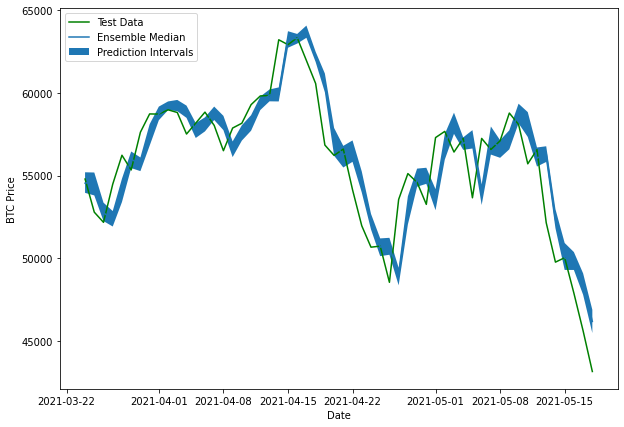

In [134]:
#Get the median and mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis = 0) 

#Plot the median of our ensemble preds along with the prediction intervals (where the prediction fall between)
offset = 500 
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label = "Test Data") 
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", label = "Ensemble Median")
plt.xlabel("Date") 
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:],
                 (upper)[offset:], label = "Prediction Intervals")
plt.legend(loc = "upper left", title_fontsize = 14);

Hmmm,

So, far all of our models prediction have been lagging behind the test data.

As they're replicating what the naive model does and just predict the previous timestamp as the next timestamp.

> 🔑 **Note:** These prediction intervals are estimates themselves. And these has been created with the assumption that our models data is from a normal distribution.

## Asides two different types of Uncertainity (coconut and subway)

Uncertainity estimates in machine learning seek out to qualitatively and quantitatively answer the questions: 

1. What can my model know? (with perfect data, what's possible for my model to learn?) 
2. What doesn't my model know? (what can a model never predict? or would it would be helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?) 

There are two major types of uncertainity in machine learning you should know about:

* **Aleatoric Uncertainity:** This types of uncertainity cannot be reduced and it is often referred as **data uncertainity** or **subway uncertainity.** 
* **Epistemic Uncertainity:** this type of uncertainity can be reduced, it is also referred to as **"model"** or **"coconut" uncertainity**. 

## Model 9: Train a model on the full historical data to make predictions into the future. 

So far all of our models have predicted on the test dataset, however this is a pseudo future. 

Let's now build a model which is capable of predicting into the future!

In [135]:
HORIZON = 1 
WINDOW_SIZE = 7  

In [136]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [137]:
#Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis = 1).to_numpy() 
#Get Labels 
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy() 

len(X_all), len(y_all)

(2780, 2780)

In [138]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [139]:
#Turn data into efficient running tensor 

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all) 
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all) 

#Combine features and label 
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

#Batch and prefetch for optimal performance 
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) 



In [140]:
tf.random.set_seed(42)

#Crreate model 9 
model_9 = tf.keras.Sequential([
                    layers.Dense(128, activation="relu"),
                    layers.Dense(128, activation="relu"),
                    layers.Dense(HORIZON)
], name="Model_9_future_model")

#compile

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = "Adam", 
              )

#Fit 
model_9.fit(dataset_all, 
            epochs = 100, 
            verbose = 0 )

### Make predictions into future

In [141]:
#How many times to predict in the future? 
INTO_FUTURE = 14  #TWO weeks


To make predictions into the future we want a function which: 

1. Takes as input: 
  * a list of values (Bitcoin historical data) 
  * a trained model (such as `model_9`)
  * a windowed into the future to predict (our `INTO_FUTURE` variable) 
  * the window size a model was trained (WINDOW_SIZE) the model can only predict on same kind of data it was trained on. 
  * Creates an emppty list for future forecasts this will be returned at the end for the end, when it's full of predictions) and extract the last `WINDOW_SIZE` values from the input values.

In [142]:
# 1. Create function to make prediction into the future 

def make_future_forecasts(values, model, into_future, window_size= WINDOW_SIZE) -> list: 
  """

  Make future forecasts into future steps after values ends. 
  Returns future forecast as a list of floats.

  """

  # 2. Create empty list for future forecast/prepare data to forecast on 
  future_forecast = [] 
  last_window = values[-WINDOW_SIZE:]

  #. Make INTO_FUTURE no of predictions, altering the data which get predicted on each
  for _ in range(INTO_FUTURE): 
    # predict on last window then append it again, again and again 
    future_pred = model.predict(tf.expand_dims(last_window, axis =0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}")

    #Append predictions to future forecast 
    future_forecast.append(tf.squeeze(future_pred).numpy()) 

    #Update last window 
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [143]:
#Make forecast into the future

future_forecast = make_future_forecasts(values = y_all, 
                                       model= model_9, 
                                       into_future = INTO_FUTURE, 
                                       window_size = WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875
Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875
Predicting on:
 [43144.47129086 55764.46484375 50985.9453125  48522.96484375
 48137

In [144]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [145]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [146]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [147]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_prices[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

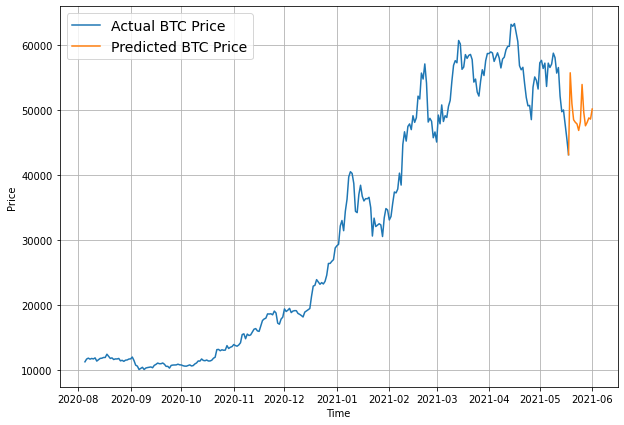

In [148]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, np.squeeze(future_forecast), format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (The Turkey Problem 🦃) 





In [149]:
#Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day) 
btc_price_turkey = btc_prices.copy() 
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [150]:
#Manufacture an extra price on the end (to showcase our Turkey problem)

btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [151]:
#Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index) 
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

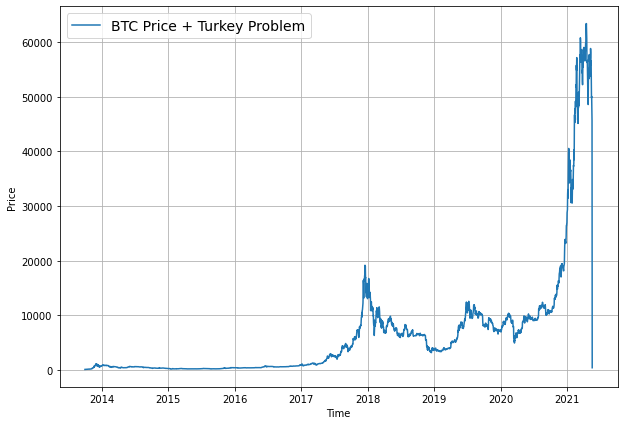

In [152]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = btc_timesteps_turkey, 
                 values = btc_price_turkey, 
                 format = "-",
                 label = "BTC Price + Turkey Problem")

In [153]:
HORIZON = 1 
WINDOW = 7 

In [154]:
#Create train test set for turkey problem data 
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size = WINDOW_SIZE, horizon = HORIZON) 

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

### Build a turkey model (model to predict on turkey data) 

In [157]:
#Clone model 1 architecture  for turkey model and fit the turkey model on the turkey data 
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model" 
turkey_model.compile(loss="mae", 
                      optimizer = tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train, 
                 epochs = 100, 
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test, y_test), 
                 callbacks = [create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [158]:
#Evaluate the model 
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 683.6700


683.6699829101562

In [160]:
#Load best performing model and evaluate 
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 649.7197


649.7197265625

In [161]:
#Make prediction with turkey model 
turkey_preds = turkey_model.predict( X_test) 
turkey_preds[:10]

array([[8856.713],
       [8755.526],
       [9025.787],
       [8755.842],
       [8725.873],
       [8750.885],
       [8695.316],
       [8469.947],
       [8474.646],
       [8516.992]], dtype=float32)

In [162]:
#Evaluate turkey preds 
turkey_result = evaluate_preds(y_true = y_test, 
                               y_pred = tf.squeeze(turkey_preds))
turkey_result

{'mae': 17130.62,
 'mape': 121.37143,
 'mase': 26.509686,
 'mse': 614511400.0,
 'rmse': 23716.344}

In [164]:
model_1_results

{'mae': 570.3397,
 'mape': 2.5392222,
 'mase': 0.99544233,
 'mse': 1180294.5,
 'rmse': 1086.4136}

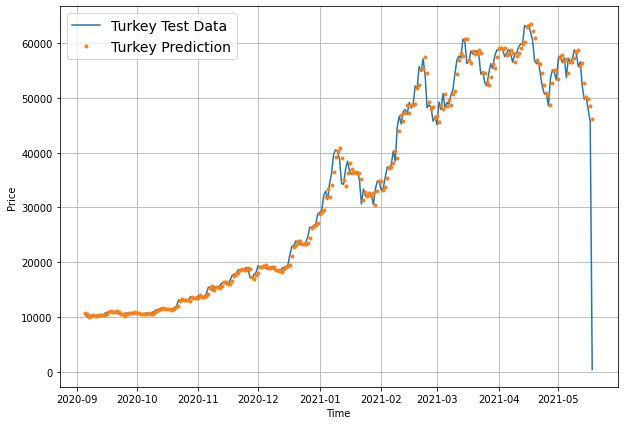

In [166]:
plt.figure(figsize = (10,7)) 
offset = 300 
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):], 
                  values = btc_price_turkey[-len(y_test):],
                      format = "-", 
                      label = "Turkey Test Data", start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):], 
                  values = tf.squeeze(turkey_preds),
                 label = "Turkey Prediction", start = offset)

## Compare models 

In [174]:
#compare different model results (w = window, h = horizon)

model_results = pd.DataFrame({"naive_results": naive_results, 
                              "model_1_dense_w7_h1" : model_1_results,
                              "model_2_dense_w30_h1": model_2_results, 
                              "model_3_dense_w30_h7": model_3_results, 
                              "model_4_conv1d": model_4_results, 
                              "model_4_lstm": model_5_result,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turley": turkey_result}).T

In [175]:
model_results

,mae,mse,rmse,mape,mase
naive_results,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,570.339722,1.180294e+06,1086.413574,2.539222,0.995442
model_2_dense_w30_h1,630.803223,1.354822e+06,1163.968140,2.779667,1.067683
model_3_dense_w30_h7,1289.952026,5.686468e+06,1478.477783,5.524307,2.205551
model_4_conv1d,575.133484,1.197863e+06,1094.469116,2.573399,1.003809
model_4_lstm,599.825317,1.281322e+06,1131.954834,2.695087,1.046905
model_6_multivariate,568.449402,1.162442e+06,1078.166260,2.555889,0.998608
model_7_NBEATS,587.376038,1.223198e+06,1105.982788,2.671491,1.031857
model_8_ensemble,563.431763,1.151190e+06,1072.935303,2.548305,0.989794
model_10_turley,17130.619141,6.145114e+08,23716.343750,121.371429,26.509686


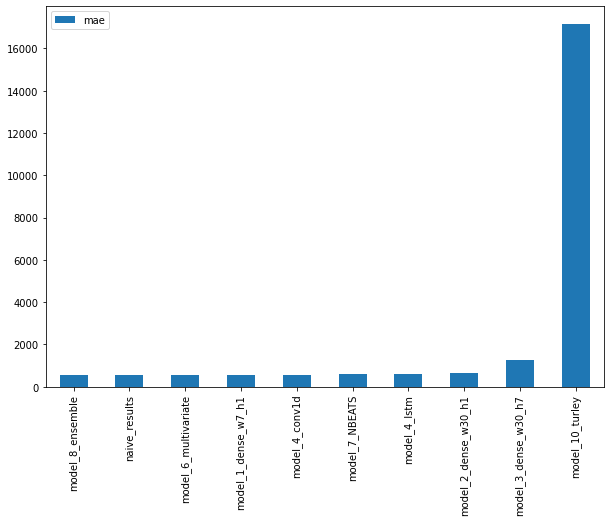

In [176]:
model_results[["mae"]].sort_values(by="mae").plot(figsize = (10, 7), kind="bar");